In [145]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as st
from scipy.integrate import odeint

# Creacion del grafo y definicion de parametros

In [146]:


N = 10**5#number of individuals

# grafo
tau = 0.3#transmission rate
gamma = 1.0 #recovery rate
rho = 0.005#initial fraction infected

# campo medio
# Infection rate, beta, and mean recovery rate, gamma.
I0, R0 = 500, 0 # 500 initial infected (0.005 of 10**5)
S0 = N - I0 - R0

In [147]:
#CREAR GRAFO ERDOS–RENYI -  (1M individuos, 5 conexiones de promedio)
kave = 10#expected number of partners

g = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph
t_g, S_g, I_g, R__g = EoN.fast_SIR(g, tau, gamma, rho=rho)

# Definicion Modelo SIR

In [148]:
# The SIR model differential equations.
def sir(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

t = np.linspace(start=0,stop=20)


In [149]:
''' 
beta, gamma = 0.0000265, 1


# Integrate the SIR equations over the time grid, t.
y = odeint(sir, y0, t_g, args=(beta, gamma))
S = y[:,0]
I = y[:,1]
R = y[:,2]
'''

' \nbeta, gamma = 0.0000265, 1\n\n\n# Integrate the SIR equations over the time grid, t.\ny = odeint(sir, y0, t_g, args=(beta, gamma))\nS = y[:,0]\nI = y[:,1]\nR = y[:,2]\n'

# Encontramos Parametros Optimos

In [150]:
#Ponemos nuestra funcion a fitear en formato correcto para pasarsela a scipy
y0 = S0, I0, R0

def fun_2_fit(xdata,beta,gamma):
    

    y = odeint(sir, y0, xdata, args=(beta, gamma))
    S = y[:,0]
    I = y[:,1]
    R = y[:,2]
    return I

In [151]:
#Fiteamos para encontrar los parametros optimos
#p0= [beta,gamma]
f= fun_2_fit
xdata = t_g
ydata= I_g
p0= [ 0.000027, 1]

params, params_covariance = scipy.optimize.curve_fit(f, xdata, ydata, p0)


In [152]:
#Ya hemos obtenido los parametros, obtenemos la grafica con los parametros ajustados
beta_ajustado = params[0]
gamma_ajustado= params[1]
print("beta_ajustado:",beta_ajustado)
print("gamma_ajustado:",gamma_ajustado)
# Integrate the SIR equations over the time grid, t.
y = odeint(sir, y0, t_g, args=(beta_ajustado, gamma_ajustado))
S = y[:,0]
I = y[:,1]
R = y[:,2]

beta_ajustado: 2.7488424431027747e-05
gamma_ajustado: 1.0530871519673743


# Dibujamos una vez obtenidos parametros optimos

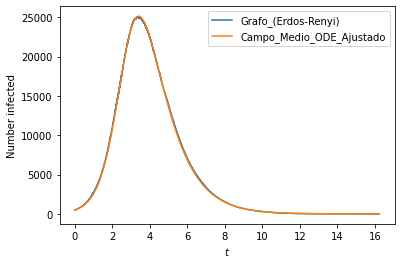

In [153]:

plt.plot(t_g, I_g, label = 'Grafo_(Erdos-Renyi)')
#plt.plot(t,S,'r',label='S(t)_Campo_Medio')
plt.plot(t_g, I,label='Campo_Medio_ODE_Ajustado')
#plt.plot(t,R,'g',label='R(t)_Campo_Medio')
plt.ylabel('Number infected')
plt.xlabel('$t$')
plt.legend()
plt.show()


# Test de Kolmogorov

In [154]:


print(st.kstest(I_g,I))

KstestResult(statistic=0.053291390766842195, pvalue=1.7770591056720215e-213)


Hemos obtenido un estadístico pequeño y en consecuencia un pvalue alto. Es decir, que las distancia máxima entre ambas curvas es pequeña. Indicación de que hemos pasado el test de Kolmogorov,como intuiamos de manera gráfica, y podemos aceptar nuestra hipótesis H0  de que ambas curvas siguen la misma distribución.


# Valor esperado e intervalo de confianza

In [ ]:
#Funcion de distribucion acumulada empirica
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / float(n)
    return(x,y)

In [158]:
def mean_confidence (sample, alpha) :
    ''' Devuelve la media muestral y el intervalo de confianza '''
    # valor de z_alpha/2
    z_2 =  scipy.stats.norm.ppf(1 - (alpha / 2) )
    
    # media muestral
    sample_mean = np.mean (sample, dtype=np.float64)
    # varianza de la muestra (n-1)
    s2 = np.var (sample, ddof=1, dtype=np.float64)
    #limites del intervalo de confianza
    I_LEFT = sample_mean - z_2 * np.sqrt(s2) / np.sqrt(len(sample)) 
    I_RIGHT = sample_mean + z_2 * np.sqrt(s2) / np.sqrt(len(sample))  
    
    return (sample_mean, I_LEFT, I_RIGHT)
    

In [164]:
# Para nuestra simulacion
sample = I_g

# media e intervalo de confianza  
alpha = 0.05

sample_mean, i_left, i_right = mean_confidence (sample, alpha)
print("Media:",sample_mean )
print("Tamaño de la muestra, n=", len(sample))
print( i_left, "<=",  chr(956), '_estimado'  , "<=", i_right)   
print (f' Error en la estimacion: {(i_right -i_left):.2f}' )  

Media: 16530.956093548146
Tamaño de la muestra, n= 172617
16495.965732979348 <= μ _estimado <= 16565.946454116944
 Error en la estimacion: 69.98


In [165]:
# Para el ODER SIR
sample = I


# media e intervalo de confianza  
alpha = 0.05

sample_mean, i_left, i_right = mean_confidence (sample, alpha)
print("Media:",sample_mean )

print("Tamaño de la muestra, n=", len(sample))
print( i_left, "<=",  chr(956), '_estimado'  , "<=", i_right)   
print (f' Error en la estimacion: {(i_right -i_left):.2f}' )  

Media: 16484.346252448788
Tamaño de la muestra, n= 172617
16448.875936645803 <= μ _estimado <= 16519.816568251772
 Error en la estimacion: 70.94
